<a href="https://colab.research.google.com/github/rafaelp89/Previs-o_deformacao_mola/blob/main/Pro_Regress%C3%A3o_mola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Este projeto realiza a análise da deformação elástica de uma mola helicoidal em função da força aplicada.

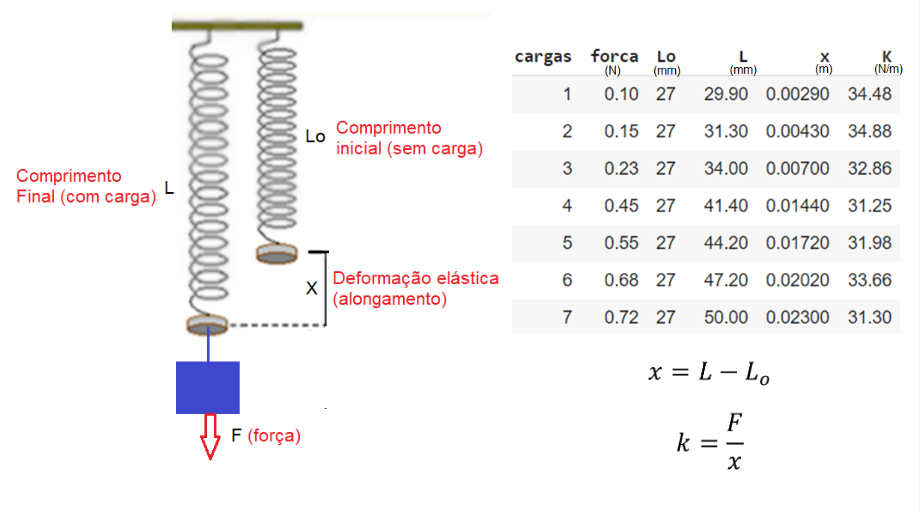

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importando as bibliotecas necessarias:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [3]:
ridigez = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CURSO Redes neurais com python/Proj Regressão/mola.csv', sep=',', encoding='iso-8859-1')

# 1 - Exploração e tratamento dos Dados

In [4]:
#base de dados
ridigez.head(26)

,cargas,forca,Lo,L,x,K
0,1,0.10,27,29.90,0.00290,34.48
1,2,0.15,27,31.30,0.00430,34.88
2,3,0.23,27,34.00,0.00700,32.86
3,4,0.45,27,41.40,0.01440,31.25
4,5,0.55,27,44.20,0.01720,31.98
5,6,0.68,27,47.20,0.02020,33.66
6,7,0.72,27,50.00,0.02300,31.30
7,8,0.83,27,51.90,0.02490,33.33
8,9,1.05,27,58.00,0.03100,33.87
9,10,1.15,27,61.20,0.03420,33.63


Nosso objetivo é tentar prever a deformação da mola em metros (variável "x") se eu aplicar uma determinada força.

In [5]:
#tamanho em linhas e colunas
ridigez.shape

(26, 6)

In [6]:
#Retirando as colunas 'cargas' e 'Lo' do dataset pois não são necessárias
rigidez2 = ridigez.drop('cargas', axis=1)
rigidez2 = rigidez2.drop('Lo', axis=1)

In [7]:
#como ficou meu dataset
rigidez2.head(26)

,forca,L,x,K
0,0.10,29.90,0.00290,34.48
1,0.15,31.30,0.00430,34.88
2,0.23,34.00,0.00700,32.86
3,0.45,41.40,0.01440,31.25
4,0.55,44.20,0.01720,31.98
5,0.68,47.20,0.02020,33.66
6,0.72,50.00,0.02300,31.30
7,0.83,51.90,0.02490,33.33
8,1.05,58.00,0.03100,33.87
9,1.15,61.20,0.03420,33.63


In [8]:
#tipos de dados do dataset
rigidez2.dtypes

,0
forca,float64
L,float64
x,float64
K,float64


## **Análises estatísticas**
Analisando somente a variável "K" percebemos por meio dos gráficos que sua distribuição nao é normal, ou seja, os dados se concentram em somente um dos lados da distribuição.

In [9]:
#importação da biblioteca para análise estatistica
from scipy import stats

In [10]:
#descrição estatística geral dos dados
rigidez2.describe()

,forca,L,x,K
count,26.000000,26.000000,26.000000,26.000000
mean,1.491538,74.820769,0.047821,31.764615
std,0.875085,28.719744,0.028720,1.404633
min,0.100000,29.900000,0.002900,29.680000
25%,0.747500,50.475000,0.023475,30.810000
50%,1.450000,72.850000,0.045850,31.300000
75%,2.180000,98.225000,0.071225,32.640000
max,3.000000,124.500000,0.097500,34.880000


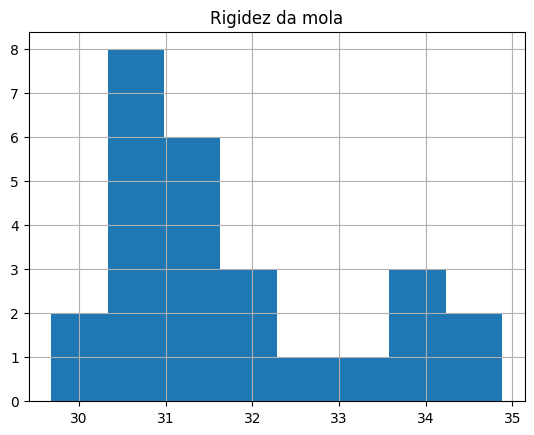

In [11]:
#aplicação de grafico somente a variável "K"
rigidez2.K.hist(bins=8)
plt.title('Rigidez da mola')
plt.show()

In [12]:
import plotly.express as px
fig = px.histogram(rigidez2, x="K", nbins=12)
fig.update_layout(width=400, height=400)
fig.show()

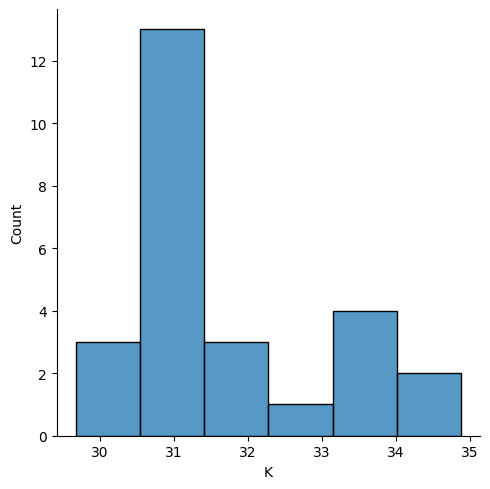

In [13]:
sns.displot(rigidez2['K'])

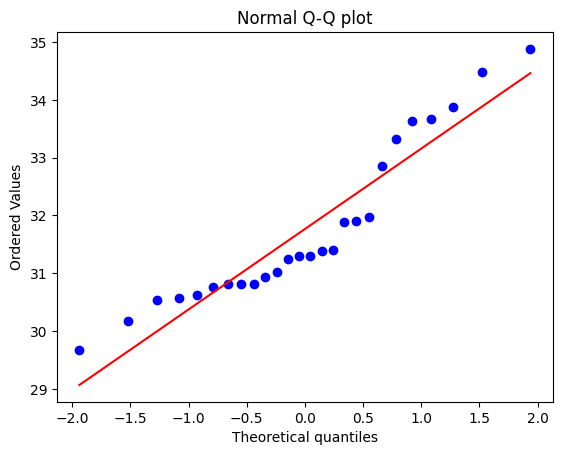

In [14]:
#a distribuição deveria estar o mais proximo da linha vermelha para ser considerada normal. No entanto não apresenta motivo de preocupação para descartar a variável.

stats.probplot(rigidez2['K'], dist='norm', plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [15]:
#gráfico boxplot
fig = px.box(rigidez2, y='K')
fig.update_layout(width=400, height=400)
fig.show()

# Correlação entre variáveis
análise por meio de gráficos para a correlação entre as variaveis do dataset. Obs: quanto mais proximo de 1 indica uma correlação positiva, abaixo de 1 correlação negativa.

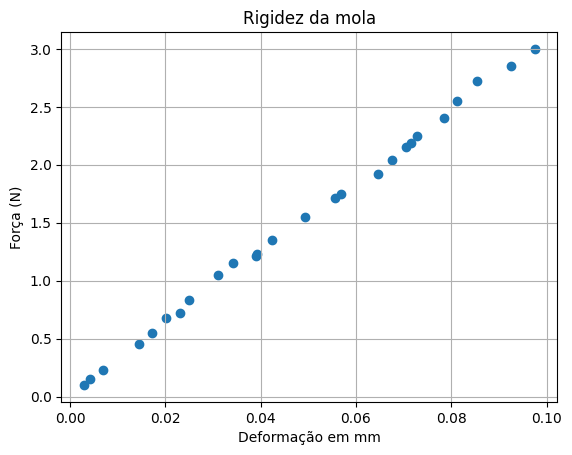

In [16]:
#analise de correlação entre as variaveis "x" e "força" indicando uma correlação positiva
plt.scatter(rigidez2['x'], rigidez2['forca'])
plt.xlabel('Deformação em mm')
plt.ylabel('Força (N)')
plt.title('Rigidez da mola')
plt.grid(True)
plt.show()

In [17]:
#por meio do Coeficiente de correlação indicamos conforme o comprovado que a relação é 1, como positiva, usando o método "kendall"
coef_correlacao = rigidez2['x'].corr(rigidez2['forca'], method='kendall')
print(coef_correlacao)

1.0


In [18]:
#comprovamos tambem através do coeficiente de determinação indicando 1
coef_determinacao = coef_correlacao**2
print(coef_determinacao)

1.0


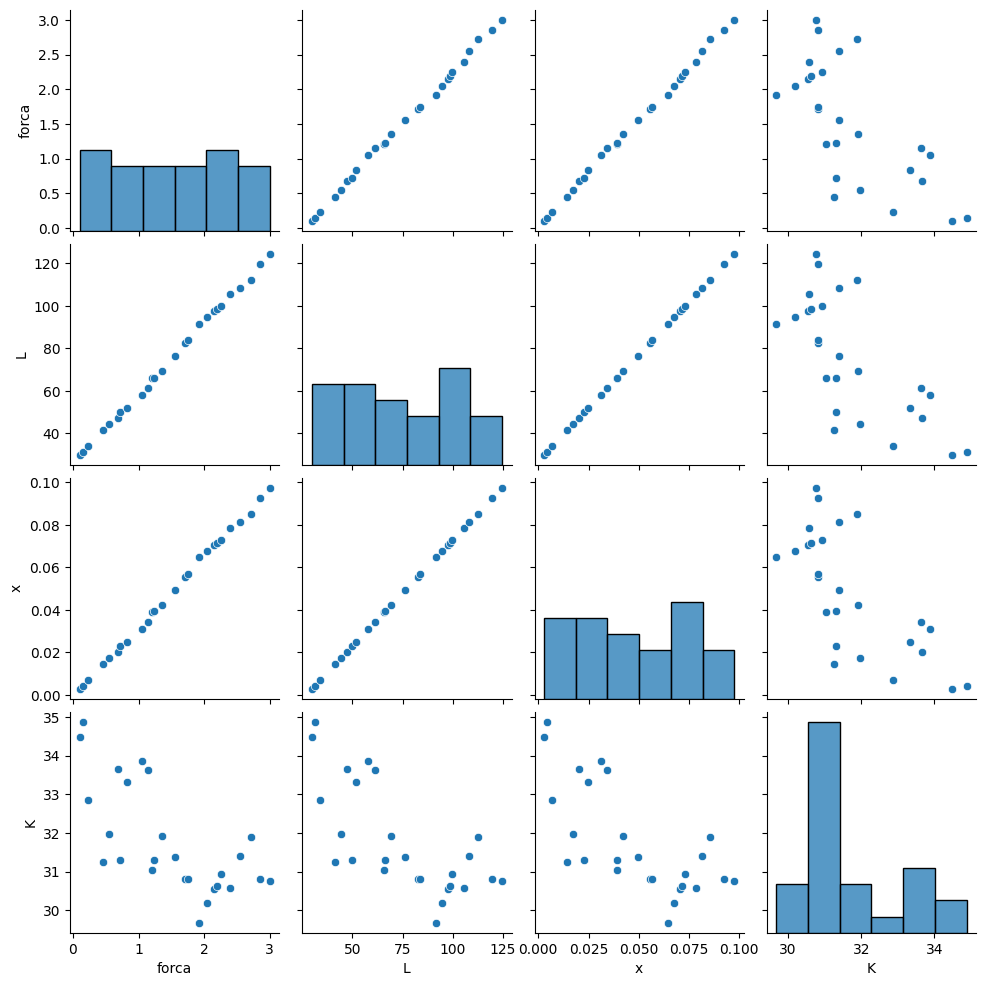

In [19]:
#por meio desses gráficos analisamos a correlação entre cada uma das variáveis. Como podemos observar algumas são positivas e outras negativas ou ruins
sns.pairplot(rigidez2)

In [20]:
#correlações mostradas através de numeros
correlacoes = rigidez2.corr(method='kendall')
correlacoes

,forca,L,x,K
forca,1.000000,1.000000,1.000000,-0.479885
L,1.000000,1.000000,1.000000,-0.479885
x,1.000000,1.000000,1.000000,-0.479885
K,-0.479885,-0.479885,-0.479885,1.000000


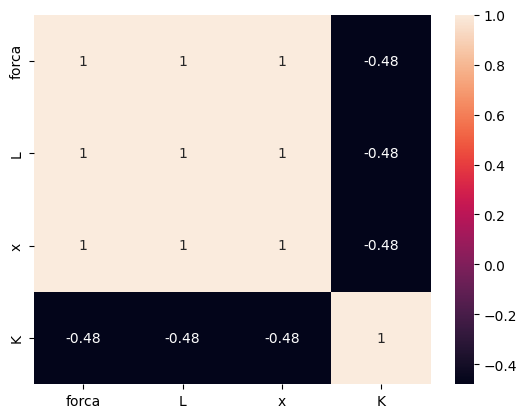

In [21]:
#por meio do mapa de calor identificamos as correlações. Quanto mais azul, mais negativo
plt.figure()
sns.heatmap(correlacoes, annot=True)
plt.show()

# Redes Neurais Artificiais: Regressão
Prob: Qual a previsão se aplicase uma determinada força ("forca"), qual seria a deformação ("x") da mola. Ou podemos também prever o contrário: qual seria a previsão da força se eu aplicasse uma determinada deformação.

In [22]:
rigidez2.head

<bound method NDFrame.head of     forca       L        x      K
0    0.10   29.90  0.00290  34.48
1    0.15   31.30  0.00430  34.88
2    0.23   34.00  0.00700  32.86
3    0.45   41.40  0.01440  31.25
4    0.55   44.20  0.01720  31.98
5    0.68   47.20  0.02020  33.66
6    0.72   50.00  0.02300  31.30
7    0.83   51.90  0.02490  33.33
8    1.05   58.00  0.03100  33.87
9    1.15   61.20  0.03420  33.63
10   1.21   66.00  0.03900  31.03
11   1.23   66.30  0.03930  31.30
12   1.35   69.30  0.04230  31.91
13   1.55   76.40  0.04940  31.38
14   1.71   82.50  0.05550  30.81
15   1.75   83.80  0.05680  30.81
16   1.92   91.70  0.06470  29.68
17   2.04   94.60  0.06760  30.18
18   2.15   97.40  0.07040  30.54
19   2.19   98.50  0.07150  30.63
20   2.25   99.74  0.07274  30.93
21   2.40  105.50  0.07850  30.57
22   2.55  108.20  0.08120  31.40
23   2.72  112.30  0.08530  31.89
24   2.85  119.50  0.09250  30.81
25   3.00  124.50  0.09750  30.77>

In [23]:
x = rigidez2.iloc[:, 2:3].values
y = rigidez2.iloc[:, 0:1].values

In [24]:
#importando a bivlioteca de rede neural
from sklearn.neural_network import MLPRegressor

In [25]:
regressor = MLPRegressor(hidden_layer_sizes=(26), activation='identity', verbose=True, batch_size=1, solver='lbfgs', random_state=12)

In [26]:
regressor.fit(x, y)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



MLPRegressor(activation='identity', batch_size=1, hidden_layer_sizes=26,
             random_state=12, solver='lbfgs', verbose=True)

In [27]:
regressor.n_layers_

3

In [28]:
#valor de taxa de acerto ou acurácia, observamos que a taxa de acerto para nosso modelo se aproxima de 100% o que é muito bom
regressor.score(x, y)

0.9980309753068722

In [29]:
#Valor da deformação
deformacao = 0.06

In [30]:
previsao_forca = regressor.predict(np.array(deformacao).reshape(1, 1))

In [31]:
#Previsão da força
previsao_forca

array([1.86206151])

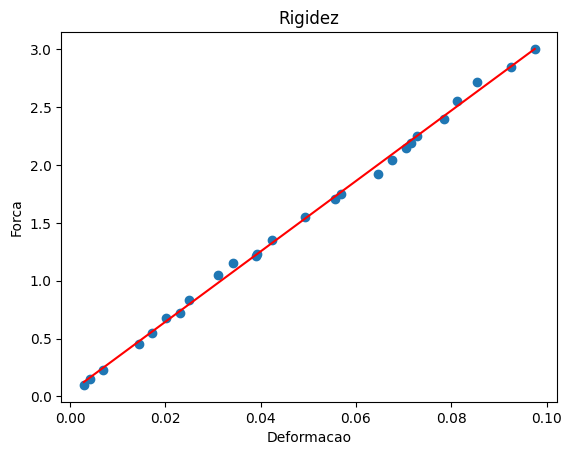

In [32]:
#gráfico representando a tendencia de distribuição normal
plt.scatter(x, y)
plt.plot(x, regressor.predict(x), color='red')
plt.title('Rigidez')
plt.xlabel('Deformacao')
plt.ylabel('Forca')
plt.show()

In [33]:
regressor.fit(y, x)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



MLPRegressor(activation='identity', batch_size=1, hidden_layer_sizes=26,
             random_state=12, solver='lbfgs', verbose=True)

In [49]:
#valor da força
forca = 0.02

In [50]:
previsao_deformacao = regressor.predict(np.array(forca).reshape(1, 1))

In [51]:
#previsão da deformação
previsao_deformacao

array([0.01999139])

# Padronizando a escala
Aplicando uma padronização dos dados fazemos com que o desvio padão das variaveis se aproximem de 0 e 1 dando uma padronização normal dos dados o que aumenta a precisão do modelo.

In [36]:
x = rigidez2.iloc[:, 2:3].values
y = rigidez2.iloc[:, 0:1].values

In [37]:
#O StandardScaler transforma seus dados de forma que sua distribuição tenha um valor médio 0 e desvio padrão de 1. Aproxima para uma distribuição normal.

from sklearn.preprocessing import StandardScaler

In [38]:
#apricando a padronoizão na variável "x"
scaler_x = StandardScaler()
x = scaler_x.fit_transform(x)
x

array([[-1.59508301],
       [-1.54537068],
       [-1.4494969 ],
       [-1.18673171],
       [-1.08730704],
       [-0.98078062],
       [-0.88135595],
       [-0.81388922],
       [-0.59728548],
       [-0.48365729],
       [-0.31321501],
       [-0.30256237],
       [-0.19603594],
       [ 0.0560766 ],
       [ 0.27268034],
       [ 0.31884179],
       [ 0.59936138],
       [ 0.70233693],
       [ 0.80176159],
       [ 0.84082128],
       [ 0.8848522 ],
       [ 1.08938294],
       [ 1.18525673],
       [ 1.33084284],
       [ 1.58650627],
       [ 1.76405031]])

In [39]:
#apricando a padronoizão na variável "y"
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)
y

array([[-1.6216671 ],
       [-1.56339825],
       [-1.47016808],
       [-1.21378511],
       [-1.09724739],
       [-0.94574837],
       [-0.89913328],
       [-0.7709418 ],
       [-0.51455883],
       [-0.39802111],
       [-0.32809849],
       [-0.30479094],
       [-0.16494569],
       [ 0.06812974],
       [ 0.25459008],
       [ 0.30120517],
       [ 0.49931928],
       [ 0.63916454],
       [ 0.76735602],
       [ 0.81397111],
       [ 0.88389373],
       [ 1.0587003 ],
       [ 1.23350687],
       [ 1.43162099],
       [ 1.58312001],
       [ 1.75792658]])

In [40]:
from sklearn.neural_network import MLPRegressor

In [41]:
regressor = MLPRegressor(hidden_layer_sizes=(26), activation='identity', verbose=True,
                         batch_size=1, solver='lbfgs', random_state = 12)

In [42]:
regressor.fit(x, y)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



MLPRegressor(activation='identity', batch_size=1, hidden_layer_sizes=26,
             random_state=12, solver='lbfgs', verbose=True)

In [43]:
#taxa de acerto ou acurácia indicando quase 100%
regressor.score(x, y)

0.9980313194394648

In [44]:
#aplicando uma deformação
deformacao = 0.005

In [52]:
#previsão da força
previsao_forca

array([1.86206151])